In [3]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Scatter, Layout, Figure, Surface

init_notebook_mode(connected=True)

# Problem 1

### (a)

Recall that the $p$-dimensional multivariate Gaussian distribution is defined by a mean vector $\mathbf{\mu}$ and a covariance matrix $\Sigma$. If $\mathbf{X}$ is normal distributed with parameters $\mathbf{\mu}$ and $\Sigma$, then $\Sigma$ contains the covariance of each pair of components of $\mathbf{X}$, i.e.,

$$
\mathrm{Cov}(X_r, X_s) = \mathbb{E}[(X_r − \mu_r)(X_s − \mu_s)] = \Sigma_{rs} = \Sigma_{sr}
$$

for  all  $1 \leq r, s \leq p$. The diagonal terms $\sigma_{rr}$ are called variances. Recall further that the correlation
coefficient is defined as 

$$
\mathrm{Cor}(X_r, X_s) = \frac{\mathrm{Cov}(X_r, X_s)}{\sqrt{\mathrm{Cov}(X_r, X_r) \mathrm{Cov}(X_s, X_s)}}
$$

Consider the bivariate case $p = 2$, and let both variables have mean zero, $\mathbf{\mu} = (0, 0)$.  Let the variance of $X_1$ be $2.0$ and the variance of $X_2$ be $3.0$. Given these constraints, find $\Sigma$ such that $\mathrm{Cor}(X_1, X_2) = -0.75$. Draw $n = 200$ data points from the normal distribution $\mathcal{N}(\mathbf{\mu}, \Sigma)$ with the obtained parameters, and evaluate the empirical covariance matrix, $\hat{\Sigma}$, and the empirical correlation between $X_1$ and $X_2$.

To get $\Sigma_{1, 2} = \mathrm{Cov}(X_1, X_2)$ we calculate

$$
\mathrm{Cov}(X_1, X_2) = \mathrm{Cor}(X_1, X_2) \sqrt{\mathrm{Var}(X_1)\mathrm{Var}(X_2)} = -0.75\sqrt{2 \cdot 3} \approx -1.84
$$

This gives the covariance matrix:

In [15]:
mu = 0
sigma = np.asarray([[2, -0.75 * np.sqrt(6)],
                    [-0.75 * np.sqrt(6), 3]])
print(sigma)

[[ 2.         -1.83711731]
 [-1.83711731  3.        ]]


No to draw the samples and check out the empirical covariance matrix.

In [16]:
np.random.seed(42)
X = np.random.multivariate_normal([mu, mu], sigma, 200)
print(np.cov(X.transpose()))

[[ 1.88069409 -1.6924891 ]
 [-1.6924891   2.71438452]]


Looks fairly similar. Not exact but close enough.

In [17]:
np.corrcoef(X.transpose())

array([[ 1.        , -0.74908503],
       [-0.74908503,  1.        ]])

The correlation coefficients are very close to the expected values. (within $0.001$)

### (b)

Create a scatter plot of the $n = 200$ points you sampled. Also use the function ```kde2d``` to obtain an estimate of the data density and visualize the density using functions such as ```contour```, ```image```,  and ```persp```.

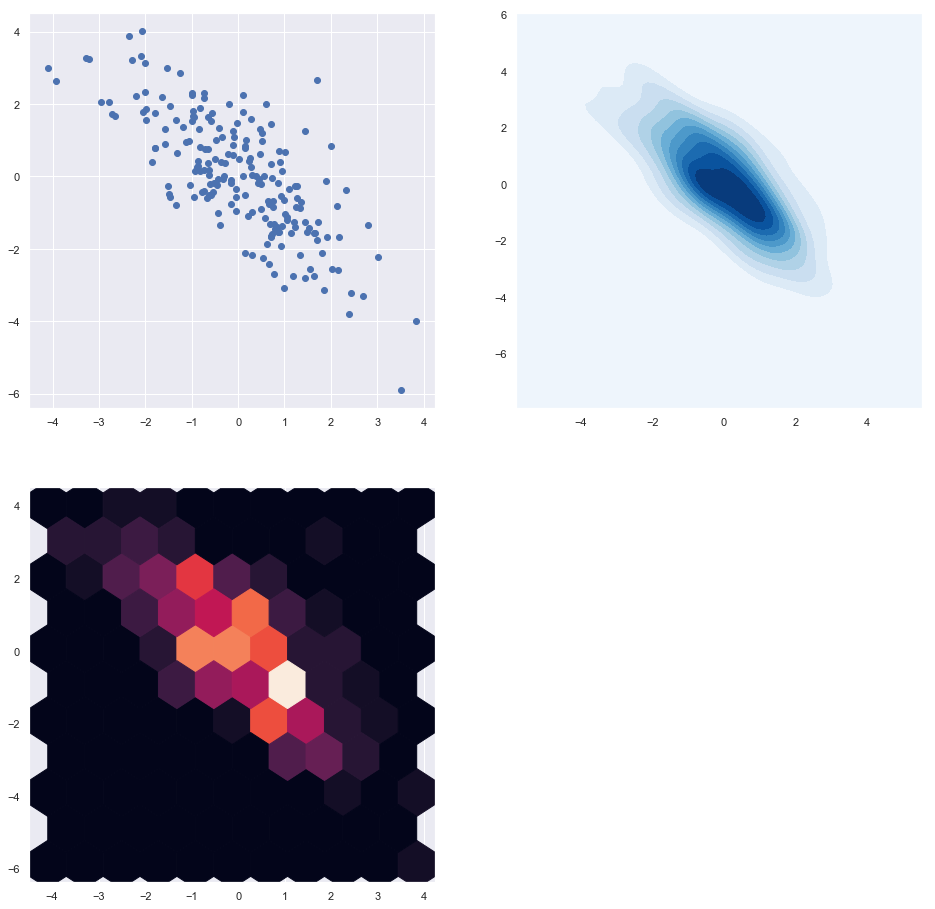

In [6]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.scatter(X[:,0], X[:,1])
plt.subplot(2, 2, 2)
sns.kdeplot(X[(slice(None),0)], X[(slice(None),1)], cmap="Blues", shade=True)
plt.subplot(2, 2, 3)
plt.hexbin(X[(slice(None),0)], X[(slice(None),1)], gridsize=10)
plt.show()

In [26]:
kde = gaussian_kde(X.transpose())
x, y = np.mgrid[-5:5.1:0.1, -5:5.1:0.1]
ps = np.vstack([x.ravel(), y.ravel()])
z = np.reshape(kde(ps).T, x.shape)
data = [Surface(
    x=x,
    y=y,
    z=z,
    colorscale="Reds")]
fig = Figure(data=data)
iplot(fig)

### (c)

Next, generate an evenly spaced grid of points of the form 

$$
x = (x_1, x_2) \in \{(i\delta, j\delta) \mid i, j \in {−20,−19,\ldots,19,20}\}
$$
with $\delta = 0.25$.  In other words, the points evenly cover a square area from $−5$ to $5$ along each axis with $41\cdot 41 = 1681$ uniformly spaced points.

Evaluate the density $\mathcal{N}(\mathbf{x}\mid \mathbf{μ}, \Sigma)$, where $\mathbf{μ}$ and $\Sigma$ are the same as in item (a), at each grid point using the multivariate normal densisty function (Lecture 4, p. 12 or the textbook p. 143, equation (4.18)), and store the resulting values in a $41\times 41$ matrix.  Use ```contour```, ```image```, and ```persp``` again to visualize the density.

Define p-dimensional Gaussian density

$$
\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \Sigma) = \frac{1}{(2\pi)^{p/2}\lvert\mathbf{\Sigma}\rvert^{1/2}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\mathbf{\Sigma}^{-1}(\mathbf{x}-\mathbf{\mu})\right)
$$

as a function of $\mathbf{x}$, $\mathbf{\mu}$, $\lvert\Sigma\rvert$ and $\mathbf{\Sigma}^{-1}$.

In [28]:
def gaussian_density(x, mu, s_det, s_inv):
    return (1/((2*np.pi)**(len(x)/2)*s_det**0.5))*np.exp(-0.5 * (x - mu).T @ s_inv @ (x - mu))

In [29]:
x, y = np.mgrid[-5:5.1:0.1, 5:-5.1:-0.1]
s_det = np.linalg.det(sigma)
s_inv = np.linalg.inv(sigma)
mu = np.zeros(2)
z = np.asarray([gaussian_density(x, mu, s_det, s_inv) for x in zip(x.ravel(), y.ravel())])
z = np.reshape(z, x.shape)
data = [Surface(
    x=x,
    y=y,
    z=z,
    colorscale="Reds")]
fig = Figure(data=data)
iplot(fig)

### (d)

Denote the mean vector in items (a)–(c) by $\mathbf{\mu}_1 = (0,0)$, and let $\mathbf{\mu}_2 = (2,1)$. Compute the density at the same set of grid points as in item (c) under distribution $\mathcal{N}(\mathcal{\mu}_2,\Sigma)$, i.e., with a different mean but the same covariance matrix.

Denote the two densities by $f_i(x) = \mathcal{N}(x\mid \mathcal{\mu}_i,\Sigma)$, $i \in\{1,2\}$. Calculate the ratio

$$
p(Y= 1\mid x) = \frac{f_1(x)\pi_1}{f_1(x)\pi_1 + f_2(x)\pi_2}
$$

with $\pi_1 = \pi_2 = \frac{1}{2}$. We will later learn that this is in fact a linear discriminant. Or to be more precise, this is the posterior probability of class $Y = 1$ given $x$.

Visualize  the  decision  boundary  using,  e.g., ```contour```.  As  the  name  suggests, you should get a linear boundary.  If you like, you can now try how well your classifier works by drawing data from either class and evaluating the above formula. What happens if you use different covariance matrices $\Sigma_1$ and $\Sigma_2$?

In [30]:
mu = np.asarray([2, 1])
z2 = np.asarray([gaussian_density(x, mu, s_det, s_inv) for x in zip(x.ravel(), y.ravel())])
z2 = np.reshape(z2, x.shape)
data = [Surface(
    x=x,
    y=y,
    z=z2,
    colorscale="Blackbody")]
fig = Figure(data=data)
iplot(fig)

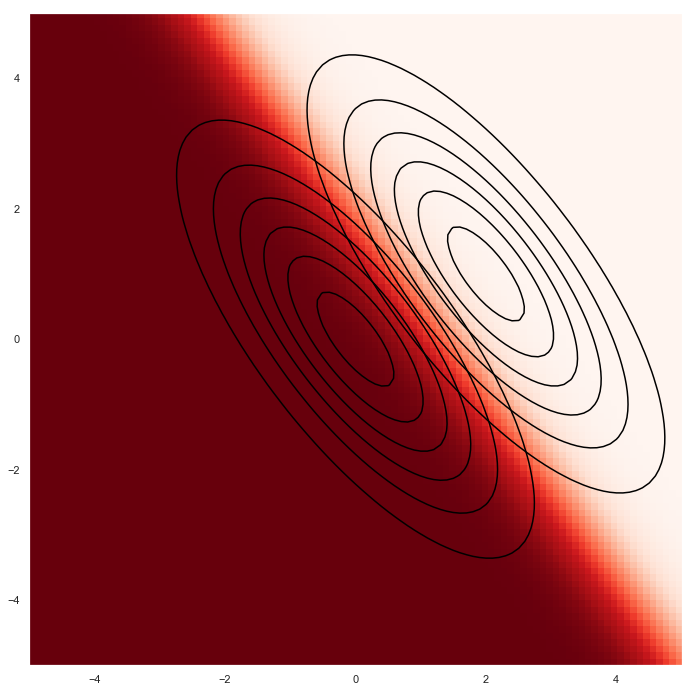

In [31]:
plt.figure(figsize=(12, 12))
plt.imshow((z/(z+z2)).T, cmap="Reds", extent=(-5,5,-5,5))
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.contour(x, y, z, colors="black")
plt.contour(x, y, z2, colors="black")
plt.gca().grid(False)
plt.show()

In [32]:
new_sigma = np.asarray([[2, -0.5 * np.sqrt(6)],
                        [-0.5 * np.sqrt(6), 1]])
ns_det = np.linalg.det(new_sigma)
ns_inv = np.linalg.inv(new_sigma)
mu = np.asarray([2, 1])
z3 = np.asarray([gaussian_density(x, mu, ns_det, ns_inv) for x in zip(x.ravel(), y.ravel())])
z3 = np.reshape(z3, x.shape)

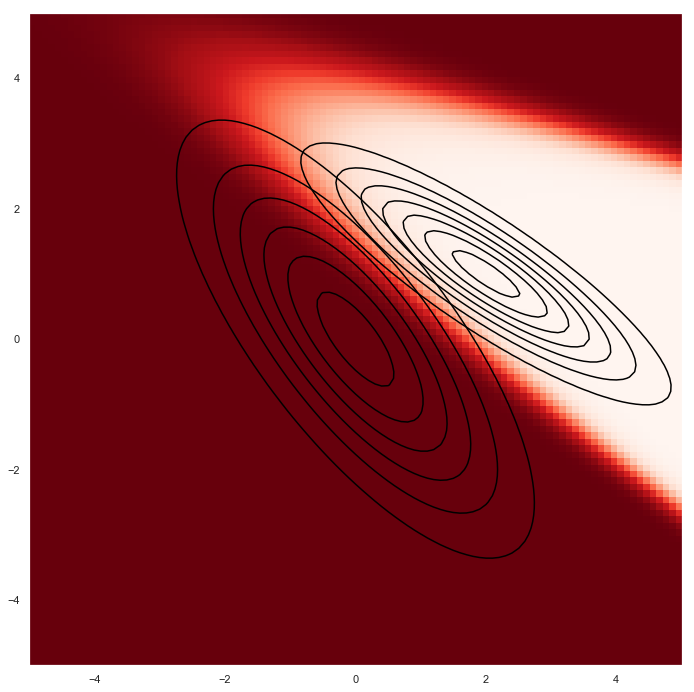

In [33]:
plt.figure(figsize=(12, 12))
plt.imshow((z/(z+z3)).T, cmap="Reds", extent=(-5,5,-5,5))
plt.ylim((-5,5))
plt.xlim((-5,5))
plt.contour(x, y, z, colors="black")
plt.contour(x, y, z3, colors="black")
plt.gca().grid(False)
plt.show()

# Problem 2

### (a)

Prove the last equality on p. 11 of the slides (Lecture 4), i.e.,

$$
\frac{1}{(2\pi)^{p/2}\sigma_1\ldots \sigma_p} \exp\left(-\frac{1}{2}\sum_{j=1}^p \frac{(x_j − \mu_j)^2}{\sigma^2_j}\right) = \frac{1}{(2\pi)^{p/2}\lvert\Sigma\rvert^{1/2}} \exp\left(−\frac{1}{2}(\mathbf{x} - \mathbf{μ})^T \Sigma^{−1} (\mathbf{x} − \mathbf{μ})\right)
$$

where $\Sigma$ is defined as on the same slide, $\lvert \Sigma \rvert$ is the determinant of $\Sigma$, and $\Sigma^{-1}$ is the inverse of $\Sigma$.

Given that $\Sigma$ is a diagonal matrix

$$
\Sigma = \begin{bmatrix}
\sigma_1^2 & 0 & \ldots & 0 \\
0 & \sigma_2^2 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \sigma_p^2
\end{bmatrix}
$$

and that the determinant of a diagonal matrix is the product of the diagonal we get

$$
\sqrt{\lvert \Sigma \rvert} = \begin{vmatrix}
\sigma_1^2 & 0 & \ldots & 0 \\
0 & \sigma_2^2 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \sigma_p^2
\end{vmatrix}^{1/2} =
\sqrt{\sigma_1^2\ldots\sigma_p^2} = \sigma_1\ldots\sigma_p
$$

We also note that

\begin{align*}
(\mathbf{x} - \boldsymbol{\mu})^T\Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu}) &= \begin{bmatrix} 
x_1 - \mu_1 & x_2 - \mu_2 & \ldots & x_p - \mu_p
\end{bmatrix}
\begin{bmatrix}
\frac{1}{\sigma_1^2} & 0 & \ldots & 0 \\
0 & \frac{1}{\sigma_2^2} & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \frac{1}{\sigma_p^2}
\end{bmatrix} 
\begin{bmatrix}
x_1 - \mu_1 \\
x_2 - \mu_2 \\
\vdots \\
x_p - \mu_p
\end{bmatrix} \\
&= \begin{bmatrix}
\frac{x_1 - \mu_1}{\sigma_1^2} & \frac{x_2 - \mu_2}{\sigma_2^2} & \ldots & \frac{x_p - \mu_p}{\sigma_p^2}
\end{bmatrix}
\begin{bmatrix}
x_1 - \mu_1 \\
x_2 - \mu_2 \\
\vdots \\
x_p - \mu_p
\end{bmatrix} \\
&=
\frac{(x_1 - \mu_1)^2}{\sigma_1^2} + \frac{(x_2 - \mu_2)^2}{\sigma_2^2} + \ldots + \frac{(x_p - \mu_p)^2}{\sigma_p^2} \\
&= \sum_{i = 1}^p\frac{(x_i-\mu_1)^2}{\sigma_i^2}
\end{align*}

We see that using all of the previously mentioned equalities the initial equality holds.

### (B)

Given $\mathcal{N}(\mathbf{x};\boldsymbol{\mu},\Sigma) = a$, solve for the value of $b$ as a function of $a$ (and $p$ and $\Sigma$) where 

$$
b = (\mathbf{x} − \boldsymbol{\mu})^T \Sigma^{-1}(\mathbf{x} − \boldsymbol{\mu})
$$

Let $p = 3$, and $\Sigma$ a diagonal matrix with $\Sigma_{jj} = j$ for all $j \in \{1, 2, 3\}$. Plug in the value $a = 1/ 100$ and and check that you get $b = 1.90495$.

\begin{align*}
a &= \frac{\exp(−b/2)}{(2\pi)^{p/2}\lvert\Sigma\rvert^{1/2}} \\
\exp\left(-\frac{b}{2}\right) &= a(2\pi)^{p/2}\lvert\Sigma\rvert^{1/2} \\
\frac{b}{2} &= -\ln \left(a(2\pi)^{p/2}\lvert\Sigma\rvert^{1/2}\right) \\
b &= -2\ln \left(a(2\pi)^{p/2}\lvert\Sigma\rvert^{1/2}\right) \\
b &= -2\ln\left(\frac{(2\pi)^{3/2}\sqrt{6}}{100}\right)
\end{align*}

In [4]:
-2 * np.log((2 * np.pi)**(3/2) * np.sqrt(6)/100)

1.9049497035200917